# Wordcloud

## Bibliotecas

In [52]:
from sqlalchemy import create_engine 
import pandas as pd 
from wordcloud import WordCloud
import re 
import unicodedata
from spacy.lang.pt.stop_words import STOP_WORDS as stop_words
import string
import matplotlib.pyplot as plt


## Importando os dados 

### Criando a conexão com o banco de dados

In [119]:
engine = #

In [121]:
query = pd.read_sql_query("SELECT * FROM brands_google_process",engine)

### Criando funções para limpeza dos dados 

### Remoção de emojis

In [122]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+",
        flags=re.UNICODE
    )
    
    return emoji_pattern.sub(r'', text)


### Capitalização do texto

In [123]:
def lower_text(text):
    return text.lower()

### Remoção de caracteres especiais

In [20]:
def remove_special_chars(text):
    text = unicodedata.normalize("NFD", text)
    text = text.encode("ascii", "ignore")
    text = text.decode("utf-8")
    
    return text

### Remoçao de pontuações

In [23]:
def remove_punctuations(text):
    punctuations = string.punctuation[:2] + string.punctuation[3:]
    table = text.maketrans(punctuations, " " * len(punctuations))
    text = text.translate(table).strip()
    text = re.sub(' +', ' ', text)

    return text

### Remoção de numeros

In [25]:
def remove_numbers(text):
    text = re.sub('[0-9]', '', text)

    return text 

### Remoção de espaço do texto

In [79]:
def space_remove(text):
    text = text.replace("  ","")
    if text[-1] == " ":
        return text[:-1]
    
    return text 


### Remoção de elementos web

In [96]:
def remove_site_elements(text):
    text = text.replace(r"http\S+", "")
    text = text.replace(r"https","")
    text = text.replace(r".br","")
    text = text.replace(r".com","")
    text = text.replace(r"www,"")
    text = text.replace(r"http", "")
    text = text.replace(r"@\S+", "")
    text = text.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", "")
    text = text.replace(r"@", "")

    return text

SyntaxError: unterminated string literal (detected at line 6) (2037811864.py, line 6)

### Removendo stop words

In [45]:
def remove_stop(text):
    lst = []
    for token in text.split():
        if token.lower() not in stop_words:
            lst.append(token)
    return " ".join(lst)

### Formatação das palavras

In [129]:
def formmating_word(text):
    tex = []
    for words in text.split():
        words.replace(" ","")
        if len(words) > 1:
            tex.append(words)
    return " ".join(tex)

In [130]:
formmating_word('itau x nubank bolsa criptos carros eletricos importa') 

'itau nubank bolsa criptos carros eletricos importa'

### Criando o normalizador 

In [131]:
def normalize(text):
    if text:
        text = remove_emojis(text)
        text = lower_text(text)
        text = remove_special_chars(text)
        text = remove_punctuations(text)
        text = formmating_word(text) 
        text = remove_numbers(text)
        text = remove_site_elements(text)
        text = remove_stop(text)
        text = remove_single(text)
    return text


## Tratando os dados 

### Filtrando os conteúdos

In [132]:
content = query['content'].to_list()

In [133]:
norm_content = [normalize(text) for text in content]

In [134]:
norm_content

['c bank lidera ranking reclamacoes instituicoes financeiras',
 'jbs presidente brasil nomeia ex bc membro',
 'jbs presidente brasil nomeia ex bc membro',
 'saiba solicitar cartao credito bv utua',
 'apos desvalorizacao cotas fip associacao questiona',
 'gestora kijani costura primeiras operacoes agronegocios',
 'cinema solar brasil chega paraiba informa',
 'cinema solar brasil chega natal',
 'fip raposo ve cota derreter investidores levam caso',
 'c bank volta liderar ranking reclamacoes bancos confira',
 'estreia carioca fluminense jogo treino',
 'carioca emociona tocar saxofone ruas vender cocadas',
 'estreia botafogo campeonato carioca ingressos venda',
 'casimiro confirma transmitir campeonato carioca twitch',
 'tecnico longevo pais volta redonda entra',
 'confira jogos campeonato carioca serao transmitidos',
 'carioca ama viajar brasil rio janeiro',
 'reag estreia gestao riqueza butique carioca financas',
 'investidor cruzeiro ronaldo transmitira campeonato carioca',
 'bairro car

In [137]:
text = [] 
for sent in norm_content:
    if sent:
        for palavra in sent.split():
            text.append(palavra)
texto = " ".join(text)

In [138]:
remove_single(texto)


'c bank lidera ranking reclamacoes instituicoes financeiras jbs presidente brasil nomeia ex bc membro jbs presidente brasil nomeia ex bc membro saiba solicitar cartao credito bv utua apos desvalorizacao cotas fip associacao questiona gestora kijani costura primeiras operacoes agronegocios cinema solar brasil chega paraiba informa cinema solar brasil chega natal fip raposo ve cota derreter investidores levam caso c bank volta liderar ranking reclamacoes bancos confira estreia carioca fluminense jogo treino carioca emociona tocar saxofone ruas vender cocadas estreia botafogo campeonato carioca ingressos venda casimiro confirma transmitir campeonato carioca twitch tecnico longevo pais volta redonda entra confira jogos campeonato carioca serao transmitidos carioca ama viajar brasil rio janeiro reag estreia gestao riqueza butique carioca financas investidor cruzeiro ronaldo transmitira campeonato carioca bairro carioca valorizou durante brazil parents want their kids vaccinated against covi

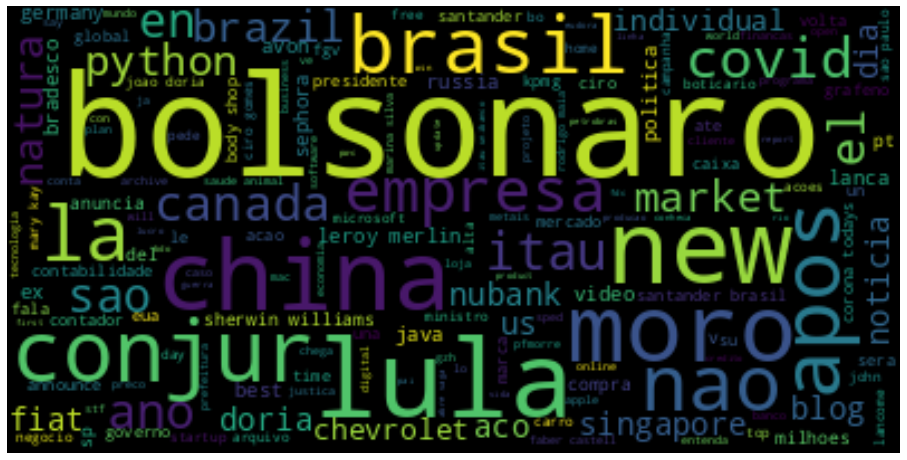

In [139]:
wordcloud = WordCloud().generate(texto)

# Display the generated image:
plt.rcParams["figure.figsize"] = (16, 10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()